In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tabpfn

In [ ]:
# The steps are similar to "Result Analysis on Preprocessed Data (Accuracy, Precision, Recall, F1, Confusion Matrix).ipynb"
import pandas as pd
df_spark = pd.read_csv('/content/drive/MyDrive/ml_iot/DF_Spark2.csv')
df_spark.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


In [ ]:
df_spark = df_spark.drop(columns="Unnamed: 0")
df_spark.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


In [ ]:
df_spark['0'].value_counts()

7.0    347924
0.0      5780
4.0      1547
2.0       889
3.0       805
5.0       532
1.0       342
6.0       122
Name: 0, dtype: int64

In [ ]:
# df_spark['0'] = '6'

In [ ]:
# n_samples = 122
# df_list = []
# for lab in df_spark["0"].unique():
#     temp = df_spark[df_spark["0"] == lab].iloc[:n_samples]
#     df_list.append(temp.copy())

# df_spark2 = pd.concat(df_list, axis=0)
# df_spark2 = df_spark2.sample(frac=1)
# df_spark2["0"].value_counts()


In [ ]:
# df_spark2

In [ ]:
# df = df_spark.drop(df_spark[df_spark['0'] == 7].index)

In [ ]:
# df['0'].value_counts()

In [ ]:
y = df_spark.iloc[:,0].values
X = df_spark.iloc[:,1:].values

# y = y[4000:8000]
# X = X[4000:8000]

In [ ]:
y = df_spark.iloc[:,0]
X = df_spark.iloc[:,1:]

In [ ]:
# y = df_spark2.iloc[:,0].values
# X = df_spark2.iloc[:,1:].values

# # y = y[4000:8000]
# # X = X[4000:8000]

In [ ]:

import numpy as np
np.unique(y)
from collections import Counter
y_list = list(y)
Counter(y_list)

Counter({7.0: 347924,
         4.0: 1547,
         3.0: 805,
         0.0: 5780,
         5.0: 532,
         1.0: 342,
         6.0: 122,
         2.0: 889})

In [ ]:
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])
y, y.shape

(array([[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]]),
 (357941, 8))

In [ ]:
n_classes = y.shape[1]
n_classes

8

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape # Size should be: ((286352, 11), (71589, 11), (286352, 8), (71589, 8))

((286352, 11), (71589, 11), (286352,), (71589,))

## Random experiments

In [ ]:
y_train_list = list(y_train)
print(Counter(y_train_list))

Counter({7.0: 278353, 0.0: 4602, 4.0: 1242, 2.0: 720, 3.0: 650, 5.0: 412, 1.0: 279, 6.0: 94})


In [ ]:
y_test_list = list(y_test)
print(Counter(y_test_list))

Counter({0.0: 39, 7.0: 29, 3.0: 25, 2.0: 23, 1.0: 23, 5.0: 21, 4.0: 21, 6.0: 15})


In [ ]:
X_train, X_test, y_train, y_test = X_train, X_test, pd.Series(y_train), pd.Series(y_test)

In [ ]:
print(type(X_train))
y_test

<class 'numpy.ndarray'>


0        7.0
1        7.0
2        7.0
3        7.0
4        7.0
        ... 
71584    7.0
71585    7.0
71586    7.0
71587    7.0
71588    7.0
Length: 71589, dtype: float64

In [ ]:
# y_train = y_train.reshape(-1)
# y_test = y_test.reshape(-1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier

# X, y = load_breast_cancer(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# ((381, 30), (381,), (188, 30), (188,))
# N_ensemble_configurations controls the number of model predictions that are ensembled with feature and class rotations (See our work for details).
# When N_ensemble_configurations > #features232334324323323232323223322323232332323233333 * #classes, no further averaging is applied.

classifier = TabPFNClassifier(device='cuda:0', N_ensemble_configurations=24)


We have to download the TabPFN, as there is no checkpoint at  /usr/local/lib/python3.10/dist-packages/tabpfn/models_diff/prior_diff_real_checkpoint_n_0_epoch_100.cpkt
It has about 100MB, so this might take a moment.
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [ ]:
classifier.fit(X_train, y_train, overwrite_warning=True)
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)

print('Accuracy', accuracy_score(y_test, y_eval))

Accuracy 0.9897959183673469


In [ ]:
from sklearn.metrics import classification_report

# target_names = ['Normal', 'DoSattack', 'scan', 'malitiousControl', 'malitiousOperation', 'spying', 'dataProbing', 'wrongSetUp']

print(classification_report(y_test, y_eval))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        39
         1.0       1.00      1.00      1.00        23
         2.0       1.00      1.00      1.00        23
         3.0       1.00      1.00      1.00        25
         4.0       1.00      1.00      1.00        21
         5.0       1.00      1.00      1.00        21
         6.0       1.00      1.00      1.00        15
         7.0       1.00      0.93      0.96        29

    accuracy                           0.99       196
   macro avg       0.99      0.99      0.99       196
weighted avg       0.99      0.99      0.99       196



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

In [ ]:
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(LogisticRegression(penalty='l2', random_state=0)))])

In [ ]:
pipe_lr = pipe_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
y_eval_lr = pipe_lr.predict(X_test)


LR accuracy (with labels encoded)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy', accuracy_score(y_test, y_eval_lr))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_eval_lr))

Accuracy 0.9822039698836413
              precision    recall  f1-score   support

           0       0.96      0.66      0.78      1178
           1       1.00      0.57      0.73        63
           2       0.97      0.92      0.95       169
           3       1.00      0.50      0.67       155
           4       0.95      0.41      0.58       305
           5       0.00      0.00      0.00       120
           6       1.00      1.00      1.00        28
           7       0.98      1.00      0.99     69571

   micro avg       0.98      0.99      0.99     71589
   macro avg       0.86      0.63      0.71     71589
weighted avg       0.98      0.99      0.98     71589
 samples avg       0.98      0.99      0.99     71589



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



LR accuracy (without labels encoded)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy', accuracy_score(y_test, y_eval_lr))

Accuracy 0.9832655854949783


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_eval_lr))

              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78      1178
         1.0       0.00      0.00      0.00        63
         2.0       0.83      0.06      0.11       169
         3.0       0.90      0.50      0.64       155
         4.0       0.00      0.00      0.00       305
         5.0       0.00      0.00      0.00       120
         6.0       0.00      0.00      0.00        28
         7.0       0.98      1.00      0.99     69571

    accuracy                           0.98     71589
   macro avg       0.46      0.28      0.32     71589
weighted avg       0.98      0.98      0.98     71589



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TabFNclassifier

In [ ]:
y_eval_lr = classifier.predict(X_test)

print('Accuracy', accuracy_score(y_test, y_eval_lr))

Accuracy 0.9897959183673469


## TabTransformer Setup

In [ ]:
!pip install -U pytorch_tabular

In [ ]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import (
    CategoryEmbeddingModelConfig,
    FTTransformerConfig,
    TabNetModelConfig,
    GatedAdditiveTreeEnsembleConfig,
    TabTransformerConfig,
    AutoIntConfig
)
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.models.common.heads import LinearHeadConfig

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
cat_cols = []
num_cols = ['1', '2', '3', '4', '5', '6','7','8','9','10','11']
target = ['0']

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df_spark, stratify=df_spark['0'], test_size=0.2, random_state=42)

In [ ]:
train.shape, test.shape

((286352, 12), (71589, 12))

In [ ]:
train

,0,1,2,3,4,5,6,7,8,9,10,11
109668,7.0,32.0,70.0,2.0,4.0,69.0,3.0,4.0,138.0,5.0,1.0,0.0000
31084,7.0,27.0,53.0,2.0,17.0,52.0,3.0,17.0,104.0,5.0,1.0,1.0000
79030,7.0,20.0,24.0,2.0,9.0,27.0,3.0,9.0,55.0,5.0,1.0,1.0000
83928,7.0,33.0,77.0,2.0,7.0,74.0,3.0,7.0,148.0,5.0,1.0,1.0000
7658,7.0,0.0,80.0,0.0,6.0,76.0,0.0,6.0,151.0,2.0,3.0,8.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
49843,7.0,0.0,80.0,0.0,6.0,76.0,0.0,6.0,152.0,3.0,1.0,0.0000
33911,7.0,4.0,15.0,0.0,5.0,15.0,0.0,5.0,29.0,2.0,1.0,9.0000
582,7.0,27.0,53.0,2.0,17.0,52.0,3.0,17.0,104.0,5.0,1.0,0.0000
58158,7.0,77.0,73.0,4.0,4.0,71.0,4.0,4.0,140.0,9.0,3.0,19.5085


## LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder

# LightGBM needs categorical columns encoded as integers
train_enc = train.copy()
test_enc = test.copy()
for col in cat_cols:
    enc = OrdinalEncoder(handle_unknown="use_encoded_value", encoded_missing_value=np.nan, unknown_value=np.nan)
    train_enc[col] = enc.fit_transform(train_enc[col].values.reshape(-1,1))
    test_enc[col] = enc.transform(test_enc[col].values.reshape(-1,1))

clf = LGBMClassifier(random_state=42)
clf.fit(train_enc.drop(columns=target[0]), train_enc[target], categorical_feature=cat_cols)
test_pred = clf.predict(test_enc.drop(columns=target[0]))
test_pred_proba = clf.predict_proba(test_enc.drop(columns=target[0]))

acc = accuracy_score(test[target[0]].values, test_pred)
loss = log_loss(test[target[0]].values, test_pred_proba)
print(f"Acc: {acc} | LogLoss: {loss}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 286352, number of used features: 11
[LightGBM] [Info] Start training from score -4.125962
[LightGBM] [Info] Start training from score -6.951849
[LightGBM] [Info] Start training from score -5.998305
[LightGBM] [Info] Start training from score -6.097278
[LightGBM] [Info] Start training from score -5.444533
[LightGBM] [Info] Start training from score -6.510538
[LightGBM] [Info] Start training from score -7.980010
[LightGBM] [Info] Start training from score -0.028386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import (
    CategoryEmbeddingModelConfig,
    FTTransformerConfig,
    TabNetModelConfig,
    GatedAdditiveTreeEnsembleConfig,
    TabTransformerConfig,
    AutoIntConfig
)
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.models.common.heads import LinearHeadConfig

In [ ]:
data_config = DataConfig(
    target=target, #target should always be a list.
    continuous_cols=num_cols,
    categorical_cols=cat_cols,
)

trainer_config = TrainerConfig(
#     auto_lr_find=True, # Runs the LRFinder to automatically derive a learning rate
    batch_size=256,
    max_epochs=500,
    early_stopping="valid_loss", # Monitor valid_loss for early stopping
    early_stopping_mode = "min", # Set the mode as min because for val_loss, lower is better
    early_stopping_patience=5, # No. of epochs of degradation training will wait before terminating
    checkpoints="valid_loss", # Save best checkpoint monitoring val_loss
    load_best=True, # After training, load the best checkpoint
)

optimizer_config = OptimizerConfig()

head_config = LinearHeadConfig(
    layers="", # No additional layer in head, just a mapping layer to output_dim
    dropout=0.1,
    initialization="kaiming"
).__dict__ # Convert to dict to pass to the model config (OmegaConf doesn't accept objects)

## CategoryEmbeddingModelConfig

In [ ]:
model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="64-32",  # Number of nodes in each layer
    activation="ReLU", # Activation between each layers
    learning_rate = 1e-3,
    head = "LinearHead", #Linear Head
    head_config = head_config, # Linear Head Config
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train)
tabular_model.evaluate(test)

Epoch 10/499 ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 975/1119 0:00:27 • 0:00:04 36.08it/s loss: 0.0108 train_loss: 0.008  
                                                                                   valid_loss: 0.012               
                                                                                   valid_accuracy: 0.994           
                                                                                   train_accuracy: 0.994           
Validation   ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 79/224   0:00:02 • 0:00:05 29.91it/s

Epoch 11/499 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 1063/1119 0:00:28 • 0:00:02 36.90it/s loss: 0.0145 train_loss: 0.007  
                                                                                   valid_loss: 0.012               
                                                                                   valid_accuracy: 0.994           
                                                                                   train_accuracy: 0.994           
Validation   ━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━ 167/224   0:00:05 • 0:00:02 32.79it/s

2023-08-28 09:49:00,642 - {pytorch_tabular.tabular_model:584} - INFO - Training the model completed
INFO:pytorch_tabular.tabular_model:Training the model completed
2023-08-28 09:49:00,645 - {pytorch_tabular.tabular_model:1258} - INFO - Loading the best model
INFO:pytorch_tabular.tabular_model:Loading the best model
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/cloud_io.py:33: LightningDeprecationWarning: `pytorch_lightning.utilities.cloud_io.get_filesystem` has been deprecated in v1.8.0 and will be removed in v2.0.0. Please use `lightning_fabric.utilities.cloud_io.get_filesystem` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('test_loss', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('test_accuracy', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │     0.994636058807373     │
│         test_loss         │    0.01137990690767765    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.01137990690767765, 'test_accuracy': 0.994636058807373}]

In [ ]:
!python --version

Python 3.10.12


## GatedAdditiveTreeEnsembleConfig

In [ ]:
model_config = GatedAdditiveTreeEnsembleConfig(
    task="classification",
    learning_rate = 1e-3,
    head = "LinearHead", #Linear Head
    head_config = head_config, # Linear Head Config
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train)
tabular_model.evaluate(test)

2023-08-28 09:59:42,330 - {pytorch_tabular.tabular_model:105} - INFO - Experiment Tracking is turned off
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Global seed set to 42
2023-08-28 09:59:42,389 - {pytorch_tabular.tabular_model:473} - INFO - Preparing the DataLoaders
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
2023-08-28 09:59:42,407 - {pytorch_tabular.tabular_datamodule:290} - INFO - Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
2023-08-28 09:59:42,641 - {pytorch_tabular.tabular_model:521} - INFO - Preparing the Model: GatedAdditiveTreeEnsembleModel
INFO:pytorch_tabular.tabular_model:Preparing the Model: GatedAdditiveTreeEnsembleModel
2023-08-28 09:59:42,783 - {pytorch_tabular.tabular_model:268} - INFO - Preparing the Trainer
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.trainer.co

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                       ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ GatedAdditiveTreesBackbone │ 72.2 K │
│ 1 │ _embedding_layer │ Embedding1dLayer           │     22 │
│ 2 │ _head            │ CustomHead                 │    146 │
│ 3 │ loss             │ CrossEntropyLoss           │      0 │
└───┴──────────────────┴────────────────────────────┴────────┘

Trainable params: 72.3 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 72.3 K                                                                                               
Total estimated model params size (MB): 0

Output()

2023-08-28 11:10:20,162 - {pytorch_tabular.tabular_model:584} - INFO - Training the model completed
INFO:pytorch_tabular.tabular_model:Training the model completed
2023-08-28 11:10:20,166 - {pytorch_tabular.tabular_model:1258} - INFO - Loading the best model
INFO:pytorch_tabular.tabular_model:Loading the best model
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9945522546768188     │
│         test_loss         │   0.012056429870426655    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.012056429870426655, 'test_accuracy': 0.9945522546768188}]

## FTTransformerConfig

In [ ]:
model_config = FTTransformerConfig(
    task="classification",
    learning_rate = 1e-3,
    head = "LinearHead", #Linear Head
    head_config = head_config, # Linear Head Config
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train)
tabular_model.evaluate(test)

2023-08-28 11:10:50,732 - {pytorch_tabular.tabular_model:105} - INFO - Experiment Tracking is turned off
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Global seed set to 42
2023-08-28 11:10:50,759 - {pytorch_tabular.tabular_model:473} - INFO - Preparing the DataLoaders
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
2023-08-28 11:10:50,771 - {pytorch_tabular.tabular_datamodule:290} - INFO - Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
2023-08-28 11:10:50,914 - {pytorch_tabular.tabular_model:521} - INFO - Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
2023-08-28 11:10:50,948 - {pytorch_tabular.tabular_model:268} - INFO - Preparing the Trainer
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.trainer.connectors.accelerator_con

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  271 K │
│ 1 │ _embedding_layer │ Embedding2dLayer      │    726 │
│ 2 │ _head            │ LinearHead            │    264 │
│ 3 │ loss             │ CrossEntropyLoss      │      0 │
└───┴──────────────────┴───────────────────────┴────────┘

Trainable params: 272 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 272 K                                                                                                
Total estimated model params size (MB): 1

Output()

2023-08-28 11:21:38,875 - {pytorch_tabular.tabular_model:584} - INFO - Training the model completed
INFO:pytorch_tabular.tabular_model:Training the model completed
2023-08-28 11:21:38,881 - {pytorch_tabular.tabular_model:1258} - INFO - Loading the best model
INFO:pytorch_tabular.tabular_model:Loading the best model
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9945801496505737     │
│         test_loss         │   0.011844197288155556    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.011844197288155556, 'test_accuracy': 0.9945801496505737}]

## TabTransformerConfig

In [ ]:
model_config = TabTransformerConfig(
    task="classification",
    learning_rate = 1e-3,
    head = "LinearHead", #Linear Head
    head_config = head_config, # Linear Head Config
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train)
tabular_model.evaluate(test)

Epoch 8/499 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 1019/1119 0:00:27 • 0:00:03 37.43it/s loss: 0.0675 train_loss: 0.059  
                                                                                   valid_loss: 0.073               
                                                                                   valid_accuracy: 0.983           
                                                                                   train_accuracy: 0.983           
Validation  ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 123/224   0:00:04 • 0:00:04 30.04it/s

Epoch 9/499 ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 566/1119 0:00:14 • 0:00:15 38.76it/s loss: 0.0774 train_loss: 0.152   
                                                                                  valid_loss: 0.071 valid_accuracy:
                                                                                  0.983 train_accuracy: 0.983      

Epoch 10/499 ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77/1119 0:00:02 • 0:00:27 38.60it/s loss: 0.0746 train_loss: 0.091   
                                                                                  valid_loss: 0.068 valid_accuracy:
                                                                                  0.983 train_accuracy: 0.983      

Epoch 10/499 ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 231/1119 0:00:06 • 0:00:24 37.70it/s loss: 0.0697 train_loss: 0.085  
                                                                                   valid_loss: 0.068               
                                                                                   valid_accuracy: 0.983           
                                                                                   train_accuracy: 0.983           

Epoch 10/499 ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 962/1119 0:00:25 • 0:00:05 38.38it/s loss: 0.0721 train_loss: 0.059  
                                                                                   valid_loss: 0.068               
                                                                                   valid_accuracy: 0.983           
                                                                                   train_accuracy: 0.983           
Validation   ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 67/224   0:00:02 • 0:00:05 32.21it/s

Epoch 11/499 ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━ 193/1119 0:00:05 • 0:00:26 35.77it/s loss: 0.0673 train_loss: 0.044  
                                                                                   valid_loss: 0.066               
                                                                                   valid_accuracy: 0.983           
                                                                                   train_accuracy: 0.983           

Epoch 11/499 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 1017/1119 0:00:28 • 0:00:03 35.92it/s loss: 0.0569 train_loss: 0.048  
                                                                                   valid_loss: 0.066               
                                                                                   valid_accuracy: 0.983           
                                                                                   train_accuracy: 0.983           
Validation   ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 122/224   0:00:03 • 0:00:04 30.60it/s

Epoch 11/499 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1118/1119 0:00:31 • 0:00:01 35.58it/s loss: 0.0569 train_loss: 0.048  
                                                                                   valid_loss: 0.066               
                                                                                   valid_accuracy: 0.983           
                                                                                   train_accuracy: 0.983           
Validation   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 223/224   0:00:07 • 0:00:01 31.31it/s

Epoch 12/499 ━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 191/1119 0:00:04 • 0:00:23 41.93it/s loss: 0.0782 train_loss: 0.075  
                                                                                   valid_loss: 0.064               
                                                                                   valid_accuracy: 0.983           
                                                                                   train_accuracy: 0.983           

Epoch 12/499 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 1083/1119 0:00:29 • 0:00:01 36.50it/s loss: 0.0641 train_loss: 0.029  
                                                                                   valid_loss: 0.064               
                                                                                   valid_accuracy: 0.983           
                                                                                   train_accuracy: 0.983           
Validation   ━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━ 188/224   0:00:05 • 0:00:02 31.64it/s

Epoch 13/499 ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 211/1119 0:00:05 • 0:00:25 37.55it/s loss: 0.0665 train_loss: 0.053  
                                                                                   valid_loss: 0.062               
                                                                                   valid_accuracy: 0.985           
                                                                                   train_accuracy: 0.984           

Epoch 14/499 ━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 653/1119 0:00:17 • 0:00:13 36.89it/s loss: 0.0558 train_loss: 0.027  
                                                                                   valid_loss: 0.061               
                                                                                   valid_accuracy: 0.985           
                                                                                   train_accuracy: 0.985           

Epoch 15/499 ━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 873/1119 0:00:22 • 0:00:07 39.42it/s loss: 0.0524 train_loss: 0.055  
                                                                                   valid_loss: 0.059               
                                                                                   valid_accuracy: 0.985           
                                                                                   train_accuracy: 0.985           

Epoch 16/499 ━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 672/1119 0:00:16 • 0:00:12 40.51it/s loss: 0.0586 train_loss: 0.08   
                                                                                   valid_loss: 0.058               
                                                                                   valid_accuracy: 0.986           
                                                                                   train_accuracy: 0.985           

Epoch 17/499 ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 226/1119 0:00:06 • 0:00:24 37.55it/s loss: 0.063 train_loss: 0.089   
                                                                                   valid_loss: 0.057               
                                                                                   valid_accuracy: 0.986           
                                                                                   train_accuracy: 0.986           

Epoch 17/499 ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 390/1119 0:00:10 • 0:00:20 37.13it/s loss: 0.0543 train_loss: 0.048  
                                                                                   valid_loss: 0.057               
                                                                                   valid_accuracy: 0.986           
                                                                                   train_accuracy: 0.986           

Epoch 19/499 ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 327/1119 0:00:07 • 0:00:19 42.46it/s loss: 0.0597 train_loss: 0.098  
                                                                                   valid_loss: 0.055               
                                                                                   valid_accuracy: 0.987           
                                                                                   train_accuracy: 0.986           

Epoch 19/499 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 1088/1119 0:00:29 • 0:00:01 36.00it/s loss: 0.0563 train_loss: 0.063  
                                                                                   valid_loss: 0.055               
                                                                                   valid_accuracy: 0.987           
                                                                                   train_accuracy: 0.986           
Validation   ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 193/224   0:00:06 • 0:00:02 29.27it/s

Epoch 20/499 ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━ 960/1119 0:00:25 • 0:00:05 37.62it/s loss: 0.0542 train_loss: 0.095  
                                                                                   valid_loss: 0.054               
                                                                                   valid_accuracy: 0.987           
                                                                                   train_accuracy: 0.987           
Validation   ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 65/224   0:00:02 • 0:00:06 28.22it/s

Epoch 21/499 ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154/1119 0:00:03 • 0:00:23 43.50it/s loss: 0.059 train_loss: 0.029   
                                                                                   valid_loss: 0.054               
                                                                                   valid_accuracy: 0.987           
                                                                                   train_accuracy: 0.987           

Epoch 21/499 ━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━ 526/1119 0:00:13 • 0:00:16 39.50it/s loss: 0.0568 train_loss: 0.105  
                                                                                   valid_loss: 0.054               
                                                                                   valid_accuracy: 0.987           
                                                                                   train_accuracy: 0.987           

Epoch 22/499 ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 222/1119 0:00:06 • 0:00:25 36.96it/s loss: 0.0656 train_loss: 0.091  
                                                                                   valid_loss: 0.054               
                                                                                   valid_accuracy: 0.989           
                                                                                   train_accuracy: 0.987           

Epoch 23/499 ━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 653/1119 0:00:15 • 0:00:12 41.39it/s loss: 0.0568 train_loss: 0.052  
                                                                                   valid_loss: 0.053               
                                                                                   valid_accuracy: 0.988           
                                                                                   train_accuracy: 0.987           

Epoch 23/499 ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━ 899/1119 0:00:22 • 0:00:06 40.44it/s loss: 0.0518 train_loss: 0.041  
                                                                                   valid_loss: 0.053               
                                                                                   valid_accuracy: 0.988           
                                                                                   train_accuracy: 0.987           
Validation   ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/224    0:00:00 • 0:00:09 26.14it/s

Epoch 23/499 ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━ 1006/1119 0:00:26 • 0:00:03 38.63it/s loss: 0.0518 train_loss: 0.041  
                                                                                   valid_loss: 0.053               
                                                                                   valid_accuracy: 0.988           
                                                                                   train_accuracy: 0.987           
Validation   ━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 110/224   0:00:03 • 0:00:05 28.09it/s

Epoch 24/499 ━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 669/1119 0:00:17 • 0:00:12 38.97it/s loss: 0.0525 train_loss: 0.038  
                                                                                   valid_loss: 0.053               
                                                                                   valid_accuracy: 0.988           
                                                                                   train_accuracy: 0.988           

Epoch 25/499 ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━ 195/1119 0:00:05 • 0:00:27 35.01it/s loss: 0.0628 train_loss: 0.18   
                                                                                   valid_loss: 0.053               
                                                                                   valid_accuracy: 0.988           
                                                                                   train_accuracy: 0.988           

Epoch 26/499 ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━ 907/1119 0:00:23 • 0:00:06 38.55it/s loss: 0.0616 train_loss: 0.035  
                                                                                   valid_loss: 0.052               
                                                                                   valid_accuracy: 0.988           
                                                                                   train_accuracy: 0.988           
Validation   ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12/224   0:00:00 • 0:00:08 28.72it/s

Epoch 27/499 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1119/1119 0:00:30 • 0:00:00 36.54it/s loss: 0.05 train_loss: 0.04     
                                                                                   valid_loss: 0.052               
                                                                                   valid_accuracy: 0.989           
                                                                                   train_accuracy: 0.988           
Validation   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224/224   0:00:07 • 0:00:00 30.38it/s

Epoch 28/499 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1115/1119 0:00:29 • 0:00:01 37.44it/s loss: 0.054 train_loss: 0.137   
                                                                                   valid_loss: 0.052               
                                                                                   valid_accuracy: 0.989           
                                                                                   train_accuracy: 0.988           
Validation   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 220/224   0:00:07 • 0:00:01 30.20it/s

Epoch 30/499 ━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━ 483/1119 0:00:12 • 0:00:16 40.22it/s loss: 0.0503 train_loss: 0.039  
                                                                                   valid_loss: 0.051               
                                                                                   valid_accuracy: 0.989           
                                                                                   train_accuracy: 0.988           

2023-08-28 11:37:53,958 - {pytorch_tabular.tabular_model:584} - INFO - Training the model completed
INFO:pytorch_tabular.tabular_model:Training the model completed
2023-08-28 11:37:53,962 - {pytorch_tabular.tabular_model:1258} - INFO - Loading the best model
INFO:pytorch_tabular.tabular_model:Loading the best model
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

Testing ━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 134/280 0:00:02 • 0:00:03 48.71it/s

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9891743063926697     │
│         test_loss         │    0.05357293412089348    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.05357293412089348, 'test_accuracy': 0.9891743063926697}]

## AutoIntConfig

In [ ]:
model_config = AutoIntConfig(
    task="classification",
    learning_rate = 1e-3,
    head = "LinearHead", #Linear Head
    head_config = head_config, # Linear Head Config
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train)
tabular_model.evaluate(test)

2023-08-28 11:37:59,689 - {pytorch_tabular.tabular_model:105} - INFO - Experiment Tracking is turned off
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Global seed set to 42
2023-08-28 11:37:59,744 - {pytorch_tabular.tabular_model:473} - INFO - Preparing the DataLoaders
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
2023-08-28 11:37:59,756 - {pytorch_tabular.tabular_datamodule:290} - INFO - Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
2023-08-28 11:37:59,917 - {pytorch_tabular.tabular_model:521} - INFO - Preparing the Model: AutoIntModel
INFO:pytorch_tabular.tabular_model:Preparing the Model: AutoIntModel
2023-08-28 11:37:59,974 - {pytorch_tabular.tabular_model:268} - INFO - Preparing the Trainer
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.trainer.connectors.accelerator_connector:Auto 

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ AutoIntBackbone  │ 13.8 K │
│ 1 │ _embedding_layer │ Embedding2dLayer │    374 │
│ 2 │ _head            │ LinearHead       │  2.8 K │
│ 3 │ loss             │ CrossEntropyLoss │      0 │
└───┴──────────────────┴──────────────────┴────────┘

Trainable params: 17.0 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 17.0 K                                                                                               
Total estimated model params size (MB): 0

Output()

2023-08-28 11:48:34,275 - {pytorch_tabular.tabular_model:584} - INFO - Training the model completed
INFO:pytorch_tabular.tabular_model:Training the model completed
2023-08-28 11:48:34,279 - {pytorch_tabular.tabular_model:1258} - INFO - Loading the best model
INFO:pytorch_tabular.tabular_model:Loading the best model
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9945382475852966     │
│         test_loss         │   0.012304659932851791    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.012304659932851791, 'test_accuracy': 0.9945382475852966}]

## TabNetModel

In [ ]:
model_config = TabNetModelConfig(
    task="classification",
    learning_rate = 1e-3,
    head = "LinearHead", #Linear Head
    head_config = head_config, # Linear Head Config
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train)
tabular_model.evaluate(test)

2023-08-28 11:48:40,490 - {pytorch_tabular.tabular_model:105} - INFO - Experiment Tracking is turned off
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Global seed set to 42
2023-08-28 11:48:40,536 - {pytorch_tabular.tabular_model:473} - INFO - Preparing the DataLoaders
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
2023-08-28 11:48:40,547 - {pytorch_tabular.tabular_datamodule:290} - INFO - Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
2023-08-28 11:48:40,723 - {pytorch_tabular.tabular_model:521} - INFO - Preparing the Model: TabNetModel
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabNetModel
2023-08-28 11:48:40,771 - {pytorch_tabular.tabular_model:268} - INFO - Preparing the Trainer
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.trainer.connectors.accelerator_connector:Auto se

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity         │      0 │
│ 1 │ _backbone        │ TabNetBackbone   │  6.4 K │
│ 2 │ _head            │ Identity         │      0 │
│ 3 │ loss             │ CrossEntropyLoss │      0 │
└───┴──────────────────┴──────────────────┴────────┘

Trainable params: 6.4 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 6.4 K                                                                                                
Total estimated model params size (MB): 0

Output()

2023-08-28 12:11:06,423 - {pytorch_tabular.tabular_model:584} - INFO - Training the model completed
INFO:pytorch_tabular.tabular_model:Training the model completed
2023-08-28 12:11:06,430 - {pytorch_tabular.tabular_model:1258} - INFO - Loading the best model
INFO:pytorch_tabular.tabular_model:Loading the best model
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9944963455200195     │
│         test_loss         │   0.011943981051445007    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.011943981051445007, 'test_accuracy': 0.9944963455200195}]

## GatedTransformer (Not working)

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4130 sha256=70646ff9e0ca60a3291305f6a08a6a06e35cbdce577478ba4eed7f3d342aa68e
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
!pip install tsai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.1/313.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# from torchviz import make_dot

from fastcore.test import test_eq
from fastcore.basics import first
from fastai.data.external import untar_data, URLs
from fastai.tabular.data import TabularDataLoaders
from fastai.tabular.core import Categorify, FillMissing
from fastai.data.transforms import Normalize

# from tsai.all import *
# from tsai.models.GatedTabTransformer import GatedTabTransformer

import warnings
warnings.filterwarnings('ignore')

<Axes: >

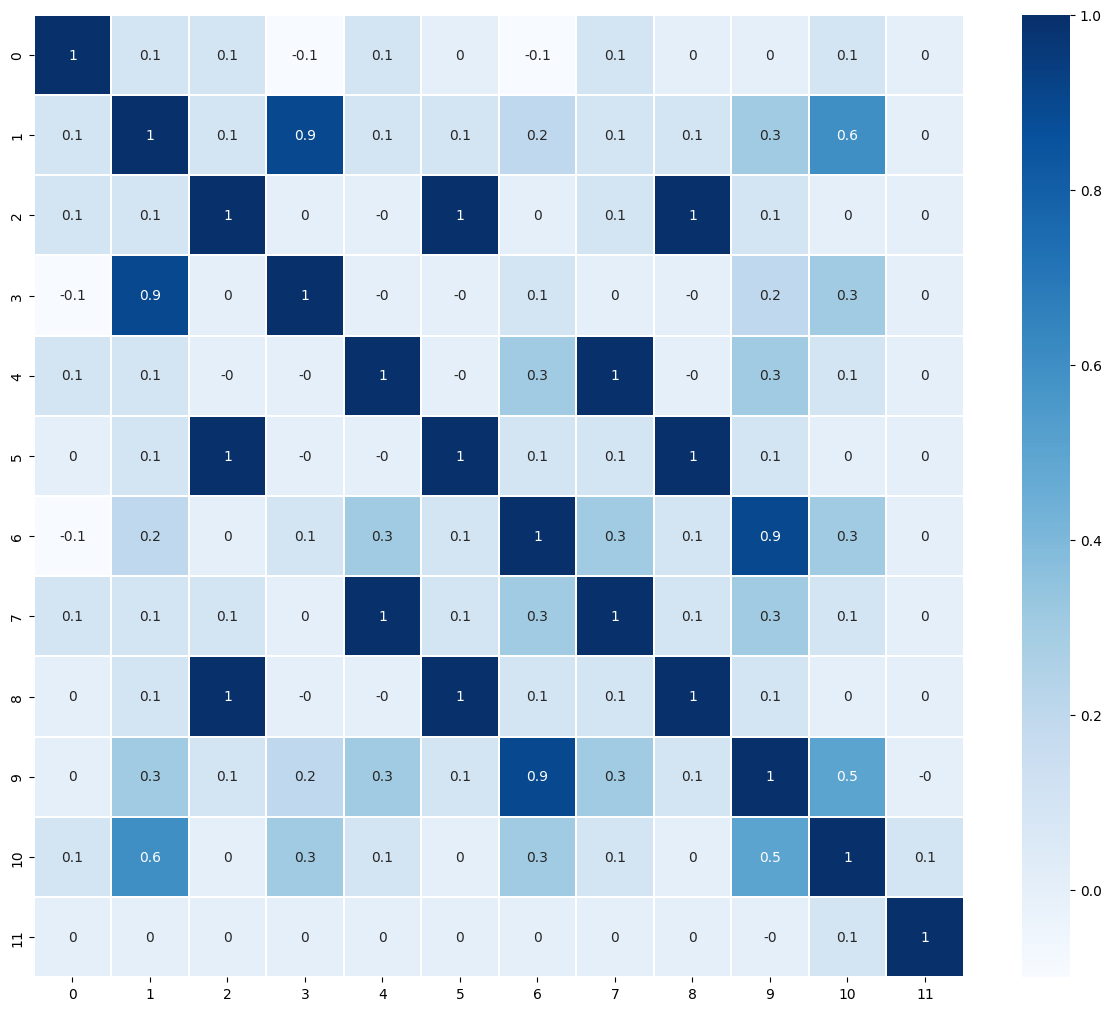

In [ ]:
corr = df_spark.corr()
f, ax = plt.subplots(figsize=(15,12.5))
cmap = sns.diverging_palette(150, 240, s=120, l=55, as_cmap=True)
sns.heatmap(round(corr, 1), annot=True,cmap='Blues',linewidth=0.1)

In [ ]:
from fastcore.test import test_eq
from fastcore.basics import first
from fastai.data.external import untar_data, URLs
from fastai.tabular.data import TabularDataLoaders
from fastai.tabular.core import Categorify, FillMissing
from fastai.data.transforms import Normalize
import pandas as pd

In [ ]:
from tsai.all import *

In [ ]:
gMLP

tsai.models.gMLP.gMLP

In [ ]:
GatedTabTransformer

tsai.models.GatedTabTransformer.GatedTabTransformer

In [ ]:
df_spark

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0000
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0000
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0000
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0000
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
357936,7.0,25.0,46.0,2.0,15.0,46.0,4.0,15.0,92.0,9.0,1.0,20.3479
357937,7.0,82.0,14.0,7.0,10.0,8.0,0.0,10.0,16.0,2.0,1.0,9.0000
357938,7.0,82.0,14.0,7.0,10.0,8.0,0.0,10.0,17.0,3.0,1.0,1.0000
357939,7.0,30.0,62.0,2.0,20.0,61.0,3.0,20.0,122.0,5.0,1.0,0.0000


In [ ]:
dls = TabularDataLoaders.from_csv('/content/drive/MyDrive/ml_iot/DF_Spark2.csv', y_names="0",
    cont_names = ['1', '2', '3', '4', '5', '6','7','8','9','10','11'],
    procs = [Categorify, FillMissing, Normalize])

In [ ]:
model = GatedTabTransformer(dls.classes, dls.cont_names, dls.c)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, amsgrad=True)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1)

In [ ]:
for epoch in range(1):
    running_loss = 0.0

    for i, batch in enumerate(dls.train):

        x_cat, x_cont, yb = batch

        optimizer.zero_grad()
        out = model(x_cat, x_cont)
        loss = criterion(out, yb.squeeze().to(dtype=torch.long))

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 20 == 19:
            print('[%d, %6d] loss: %.6f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

    scheduler.step()

IndexError: ignored

In [ ]:
!git clone https://github.com/CahidArda/tab-transformer-keras.git

Cloning into 'tab-transformer-keras'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 26 (delta 8), reused 22 (delta 6), pack-reused 0
Receiving objects: 100% (26/26), 91.95 KiB | 5.75 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
%cd tab-transformer-keras

/content/tab-transformer-keras


In [ ]:
import pandas as pd
from tab_transformer_keras import TabTransformer
from misc import get_X_from_features

# df = pd.read_csv('data.csv')

cat_features  = ['0']
cont_features = ['1', '2', '3', '4', '5', '6','7','8','9','10','11']

X = get_X_from_features(df_spark, cont_features, cat_features)


In [ ]:
X

[           1     2    3     4     5    6     7      8    9   10       11
 0       21.0  30.0  2.0   3.0  30.0  2.0   3.0   59.0  7.0  2.0   0.0000
 1       32.0  70.0  2.0   4.0  68.0  2.0   4.0  134.0  7.0  2.0   0.0000
 2       15.0   1.0  2.0   2.0   0.0  2.0   2.0    0.0  7.0  2.0   0.0000
 3       33.0  77.0  2.0   7.0  73.0  2.0   7.0  144.0  7.0  2.0   0.0000
 4       55.0  78.0  3.0   7.0  74.0  3.0   7.0  146.0  8.0  2.0   0.0000
 ...      ...   ...  ...   ...   ...  ...   ...    ...  ...  ...      ...
 357936  25.0  46.0  2.0  15.0  46.0  4.0  15.0   92.0  9.0  1.0  20.3479
 357937  82.0  14.0  7.0  10.0   8.0  0.0  10.0   16.0  2.0  1.0   9.0000
 357938  82.0  14.0  7.0  10.0   8.0  0.0  10.0   17.0  3.0  1.0   1.0000
 357939  30.0  62.0  2.0  20.0  61.0  3.0  20.0  122.0  5.0  1.0   0.0000
 357940  30.0  62.0  2.0  20.0  62.0  4.0  20.0  123.0  9.0  1.0  20.4131
 
 [357941 rows x 11 columns],
 0         7.0
 1         7.0
 2         7.0
 3         7.0
 4         7.0
      

In [ ]:
# Counter({7.0: 347924,
#          4.0: 1547,
#          3.0: 805,
#          0.0: 5780,
#          5.0: 532,
#          1.0: 342,
#          6.0: 122,
#          2.0: 889})
tabTransformer = TabTransformer(
    categories = [5780, 342,889,805,1547, 532, 122, 347924], # number of unique elements in each categorical feature
    num_continuous = 11,      # number of numerical features
    dim = 16,                # embedding/transformer dimension
    dim_out = 1,             # dimension of the model output
    depth = 6,               # number of transformer layers in the stack
    heads = 8,               # number of attention heads
    attn_dropout = 0.1,      # attention layer dropout in transformers
    ff_dropout = 0.1,        # feed-forward layer dropout in transformers
    mlp_hidden = [(32, 'relu'), (16, 'relu')] # mlp layer dimensions and activations
)

pred = tabTransformer.predict(X)

11186/11186 [==============================] - 115s 10ms/step


In [ ]:
pred

array([[-0.93307024],
       [-0.9234047 ],
       [-2.556221  ],
       ...,
       [-1.6023073 ],
       [-0.93397903],
       [-0.86373824]], dtype=float32)